In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [67]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [2]:
df = pd.read_csv('./dataset/datos_properati.csv', index_col=0, parse_dates=True)

In [3]:
df_filtered = df.loc[(df.property_type != 'store')]

In [56]:
def getPrice(data, comuna, property_type, m = 2.):
    #busco registros que contengan los 2 precios necesarios
    fullData = data.loc[(data.price_aprox_usd.isna()==False) & 
                        (data.price_usd_per_m2.isna()==False)]
    #Sobre el df con datos completos busco los correspondientes a la comuna y tipo de propiedad
    comunaData = fullData.loc[(fullData.comuna == comuna) 
                              & (fullData.property_type == property_type)
                              , ['price_usd_per_m2']]    
    #Basado en https://stackoverflow.com/a/16562028 limpio los outliers
    d = np.abs(comunaData - np.median(comunaData))
    mdev = np.median(d)
    s = d/mdev if mdev else 0
    outliersClear = comunaData[s<m] 
    #Devuelvo el price_usd_per_m2 limpio
    return outliersClear.loc[(outliersClear.price_usd_per_m2.isna() == False),['price_usd_per_m2']].mean()[0]

### Precio promedio para departamentos de la comuna 14 (Palermo)

In [57]:
getPrice(df_filtered, 14, 'apartment')

3245.2353260501573

### Precio promedio por comunas

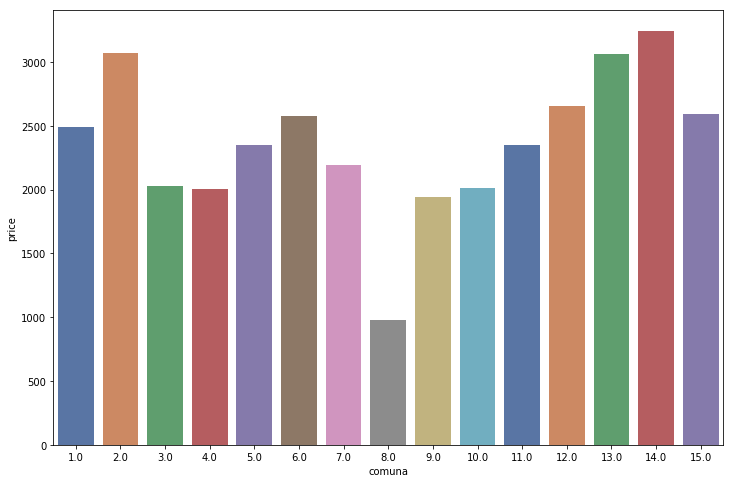

In [70]:
comunas = df_filtered.comuna.unique()
prices = []

for comuna in comunas:
    prices.append(getPrice(df_filtered, comuna, 'apartment'))
 
priceByComuna = pd.DataFrame(data={'comuna' : comunas, 'price' : prices})

sns.barplot(x=priceByComuna.comuna, y=priceByComuna.price, palette="deep")